In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('lvl_candice.csv')
df

,0BILL_TYPE___T,0FISCYEAR,0DIVISION___T,Transactoin State,Material Level 2,Material Level 3,Material Group,Material Grade,Plant Nbr,Ship To City,...,Ship To State,Ship To Region,Ship To Country,Cal_Quarter_text,Fiscal_Year_Period_Text,Product ID,Date,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP
0,DOMESTIC INVOICE,2015,EWP,Finished Product,LVL,SLD,LV1.718,2.0E,3025.0,BROKEN ARROW,...,Oklahoma,SOUTH CENTRAL,US,2015.Q3,2015.08,32270,2015.08.05,3811.20,210,18.15
1,DOMESTIC INVOICE,2017,EWP,Finished Product,LVL,SLD,LV1.711.8,2.0E,3625.0,BOISE,...,Idaho,NORTHWEST,US,2017.Q4,2017.12,32171,2017.12.27,1236.40,63,19.63
2,DOMESTIC INVOICE,2018,EWP,Finished Product,LVL,SLD,LV1.711.8,2.0E,3025.0,LORIS,...,South Carolina,MID ATLANTIC,US,2018.Q1,2018.02,32172,2018.02.20,3024.00,139,21.76
3,DOMESTIC INVOICE,2017,EWP,Finished Product,LVL,SLD,LV1.711.8,2.0E,3445.0,MONTGOMERY,...,Alabama,SOUTHEAST,US,2017.Q2,2017.04,32179,2017.04.20,1964.80,92,21.36
4,DOMESTIC INVOICE,2017,EWP,Finished Product,LVL,SLD,LV1.716,2.0E,3025.0,MONROE,...,Louisiana,SOUTH CENTRAL,US,2017.Q3,2017.09,32242,2017.09.06,2250.00,117,19.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224903,DOMESTIC INVOICE,2018,EWP,Finished Product,LVL,SLD,LV1.711.8,2.0E,3305.0,BOISE,...,Idaho,NORTHWEST,US,2018.Q1,2018.01,32167,2018.01.10,4720.80,242,19.51
224904,X-BORDER INVOICE,2019,EWP,Finished Product,LVL,SLD,LV1.711.8,2.0E,3010.0,CLARKSVILLE,...,Indiana,MIDWEST,US,2019.Q2,2019.04,32180,2019.04.23,2384.00,115,20.73
224905,X-BORDER INVOICE,2014,EWP,Finished Product,LVL,SLD,LV1.714,2.0E,3010.0,WEST SALEM,...,Wisconsin,NORTH CENTRAL,US,2014.Q4,2014.12,32210,2014.12.04,1512.00,82,18.44
224906,DOMESTIC INVOICE,2019,EWP,Finished Product,LVL,SLD,LV3.511.8,2.0E,3305.0,CHINO,...,California,WEST,US,2019.Q4,2019.11,32370,2019.11.13,2511.36,111,22.62


In [3]:
df.columns

Index(['0BILL_TYPE___T', '0FISCYEAR', '0DIVISION___T', 'Transactoin State',
       'Material Level 2', 'Material Level 3', 'Material Group',
       'Material Grade', 'Plant Nbr', 'Ship To City', 'Ship To County',
       'Ship To State', 'Ship To Region', 'Ship To Country',
       'Cal_Quarter_text', 'Fiscal_Year_Period_Text', 'Product ID', 'Date',
       'Mill_Amount_in_SC', 'Qty_in_Conv_Vol', 'ASP'],
      dtype='object')

In [4]:
df = df.drop(columns=['Mill_Amount_in_SC','Qty_in_Conv_Vol','Fiscal_Year_Period_Text','Cal_Quarter_text', 'Ship To Region', 'Ship To Country','Plant Nbr', 'Ship To City', 'Ship To County','0DIVISION___T', 'Transactoin State',
        'Material Level 3', 'Material Group','Material Grade'])

In [5]:
df

,0BILL_TYPE___T,0FISCYEAR,Material Level 2,Ship To State,Product ID,Date,ASP
0,DOMESTIC INVOICE,2015,LVL,Oklahoma,32270,2015.08.05,18.15
1,DOMESTIC INVOICE,2017,LVL,Idaho,32171,2017.12.27,19.63
2,DOMESTIC INVOICE,2018,LVL,South Carolina,32172,2018.02.20,21.76
3,DOMESTIC INVOICE,2017,LVL,Alabama,32179,2017.04.20,21.36
4,DOMESTIC INVOICE,2017,LVL,Louisiana,32242,2017.09.06,19.23
...,...,...,...,...,...,...,...
224903,DOMESTIC INVOICE,2018,LVL,Idaho,32167,2018.01.10,19.51
224904,X-BORDER INVOICE,2019,LVL,Indiana,32180,2019.04.23,20.73
224905,X-BORDER INVOICE,2014,LVL,Wisconsin,32210,2014.12.04,18.44
224906,DOMESTIC INVOICE,2019,LVL,California,32370,2019.11.13,22.62


In [6]:
df = df.loc[df['0FISCYEAR']==2019].dropna()


In [7]:
df.columns

Index(['0BILL_TYPE___T', '0FISCYEAR', 'Material Level 2', 'Ship To State',
       'Product ID', 'Date', 'ASP'],
      dtype='object')

In [8]:
X = df[['Date','Ship To State','ASP']]
y = df[['Product ID']].values.reshape(-1,1)
print(X.shape, y.shape)

(33153, 3) (33153, 1)


In [9]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,ASP,Date_2019.01.01,Date_2019.01.02,Date_2019.01.03,Date_2019.01.04,Date_2019.01.06,Date_2019.01.07,Date_2019.01.08,Date_2019.01.09,Date_2019.01.10,...,Ship To State_South Carolina,Ship To State_South Dakota,Ship To State_Tennessee,Ship To State_Texas,Ship To State_Utah,Ship To State_Victoria,Ship To State_Virginia,Ship To State_Washington,Ship To State_West Virginia,Ship To State_Wisconsin
5,19.75,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,19.58,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,19.34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15,22.58,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21,26.43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,ASP,Date_2019.01.01,Date_2019.01.02,Date_2019.01.03,Date_2019.01.04,Date_2019.01.06,Date_2019.01.07,Date_2019.01.08,Date_2019.01.09,Date_2019.01.10,...,Ship To State_South Carolina,Ship To State_South Dakota,Ship To State_Tennessee,Ship To State_Texas,Ship To State_Utah,Ship To State_Victoria,Ship To State_Virginia,Ship To State_Washington,Ship To State_West Virginia,Ship To State_Wisconsin
193644,21.19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125238,23.20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20032,22.39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179617,19.43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78109,21.68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [12]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

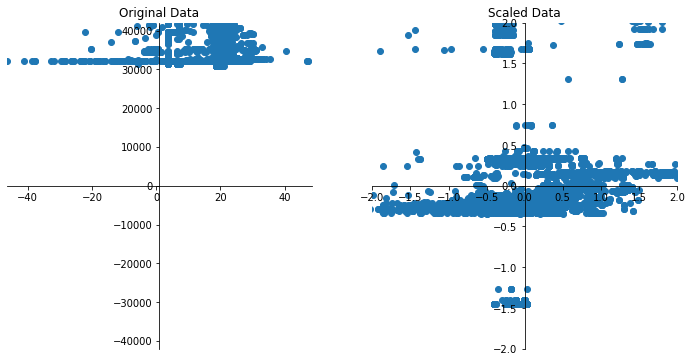

In [13]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train['ASP'].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train['ASP'], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [14]:
X = pd.get_dummies(df[['Date','Ship To State','ASP']])
y = df[['Product ID']].values.reshape(-1,1)
X.head()

,ASP,Date_2019.01.01,Date_2019.01.02,Date_2019.01.03,Date_2019.01.04,Date_2019.01.06,Date_2019.01.07,Date_2019.01.08,Date_2019.01.09,Date_2019.01.10,...,Ship To State_South Carolina,Ship To State_South Dakota,Ship To State_Tennessee,Ship To State_Texas,Ship To State_Utah,Ship To State_Victoria,Ship To State_Virginia,Ship To State_Washington,Ship To State_West Virginia,Ship To State_Wisconsin
5,19.75,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,19.58,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,19.34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15,22.58,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21,26.43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

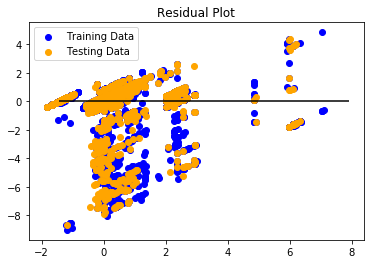

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7072089506196971, R2: 0.30166494484820117
